# Imports

In [3]:
import os
import numpy as np 
import pandas as pd  
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
from pandas.testing import assert_frame_equal





In [5]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 
np.random.seed(RANDOM_SEED)

In [7]:
!pip install yfinance
!pip install yahoofinancials

In [8]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") 
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") 
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") 
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") 
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") 
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") 
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(2673, 5) (2673, 5) (2673, 5) (2673, 5) (2673, 5) (2673, 5)


# GOOG

In [10]:
GOOG

Ticker           GOOG                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2012-05-18  15.477144  15.658384  14.773975  14.865585  239835606
2012-05-21  14.868309  15.244158  14.855681  15.205037  123477094
2012-05-22  15.188449  15.197609  14.756644  14.875489  122533571
2012-05-23  14.896535  15.093374  14.784376  15.089907  127600492
2012-05-24  15.082479  15.150815  14.827705  14.946302   75935562
...               ...        ...        ...        ...        ...
2022-12-23  87.102251  89.567592  87.102251  89.279305   17815000
2022-12-27  88.782258  88.971138  87.017753  87.410416   15470900
2022-12-28  86.982960  87.996929  85.859640  85.949104   17879600
2022-12-29  86.515732  88.836934  86.475968  88.424385   18280700
2022-12-30  86.848764  88.305111  86.515744  88.205704   19190300

[2673 rows x 5 columns]

# AAPL

In [12]:
AAPL

Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   16.029536   16.313226   15.675900   15.922064  732292400
2012-05-21   16.045756   16.857500   16.032246   16.849693  631106000
2012-05-22   17.097962   17.227950   16.588522   16.720310  694870400
2012-05-23   16.736212   17.195522   16.608028   17.128277  584897600
2012-05-24   17.287684   17.306597   16.848189   16.970972  496230000
...                ...         ...         ...         ...        ...
2022-12-23  129.099300  130.578440  127.837102  130.026230   63814900
2022-12-27  129.552881  129.582462  126.929870  128.221649   69007800
2022-12-28  127.866670  129.207757  124.119521  124.287155   85438400
2022-12-29  126.210037  128.665406  125.953658  127.807510   75703700
2022-12-30  126.624166  128.142742  125.657792  128.123016   77034200

[2673 rows x 5 columns]

# META

In [14]:
META

Ticker            META                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2012-05-18   41.820569   44.754474   37.792667   38.021412  573576400
2012-05-21   36.330686   36.459977   32.819947   33.844326  168192700
2012-05-22   32.432076   33.406729   30.771188   30.830860  101786600
2012-05-23   31.198840   32.322673   31.188894   31.825401   73600000
2012-05-24   32.770220   33.028799   31.596657   32.849781   50237200
...                ...         ...         ...         ...        ...
2022-12-23  115.396923  117.535193  114.909598  117.395958   17796600
2022-12-27  117.286561  117.952903  115.416821  116.242287   21392300
2022-12-28  115.615726  117.505361  114.879766  114.989166   19612500
2022-12-29  115.764919  120.369654  115.138351  119.603859   22366200
2022-12-30  117.515312  119.762976  117.097598  119.683411   19583800

[2673 rows x 5 columns]

# AMZN

In [16]:
AMZN

Ticker           AMZN                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2012-05-18  10.970500  10.981500  10.640500  10.692500  104634000
2012-05-21  10.701500  10.999000  10.641000  10.905500   71596000
2012-05-22  10.915500  10.943500  10.698000  10.766500   74662000
2012-05-23  10.735500  10.877500  10.559000  10.864000   84876000
2012-05-24  10.849000  10.883000  10.635000  10.762000   62822000
...               ...        ...        ...        ...        ...
2022-12-23  83.250000  85.779999  82.930000  85.250000   57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001   57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000   58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000   54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000   62401200

[2673 rows x 5 columns]

# MSFT

In [18]:
MSFT

Ticker            MSFT                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2012-05-18   23.682535   23.698434   23.189645   23.269144  56205300
2012-05-21   23.134001   23.682540   23.102201   23.650740  38787900
2012-05-22   23.603037   23.754083   23.451990   23.658686  39504900
2012-05-23   23.332744   23.372493   22.768306   23.141949  65171000
2012-05-24   23.181702   23.292999   22.863709   23.110153  52575000
...                ...         ...         ...         ...       ...
2022-12-23  231.028252  233.728844  228.904959  233.591858  21207000
2022-12-27  233.562526  233.787572  230.754301  231.859985  16688600
2022-12-28  231.791461  234.560553  229.130002  229.482254  17457100
2022-12-29  230.578161  236.713218  230.578161  235.822800  19770700
2022-12-30  233.083083  234.795418  231.566440  234.658432  21938500

[2673 rows x 5 columns]

# GSPC

In [20]:
GSPC

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  4512470000
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  3786750000
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  4123680000
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  4108330000
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  3937670000
...                 ...          ...          ...          ...         ...
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068  2819280000
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000  3030300000
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971  3083520000
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029  3003680000
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000  2979870000

[2673 rows x 5 columns]

# Finding Missing Values

In [22]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [23]:
AAPL.isnull().sum()

Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [24]:
META.isnull().sum()

Ticker  Price 
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [25]:
AMZN.isnull().sum()

Ticker  Price 
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [26]:
MSFT.isnull().sum()

Ticker  Price 
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [27]:
GSPC.isnull().sum()

Ticker  Price 
^GSPC   Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [28]:
tickers = ["GOOG", "AAPL", "META", "AMZN", "MSFT", "^GSPC"]

dataset = yf.download(tickers, start="2015-01-01", end="2025-01-01")['Close']
dataset.columns = ['GOOG', 'AAPL', 'META', 'AMZN', 'MSFT', 'GSPC']

print(dataset.head())


[*********************100%***********************]  6 of 6 completed

                 GOOG     AAPL       META       AMZN       MSFT         GSPC
Date                                                                        
2015-01-02  24.261045  15.4260  26.014023  78.021965  39.933056  2058.199951
2015-01-05  23.577583  15.1095  25.471745  76.768837  39.565834  2020.579956
2015-01-06  23.579796  14.7645  24.881384  75.734520  38.985126  2002.609985
2015-01-07  23.910435  14.9210  24.838755  75.734520  39.480442  2025.900024
2015-01-08  24.829119  15.0230  24.917070  77.753448  40.641876  2062.139893


In [29]:
dataset.head()

GOOG     AAPL       META       AMZN       MSFT         GSPC
Date                                                                        
2015-01-02  24.261045  15.4260  26.014023  78.021965  39.933056  2058.199951
2015-01-05  23.577583  15.1095  25.471745  76.768837  39.565834  2020.579956
2015-01-06  23.579796  14.7645  24.881384  75.734520  38.985126  2002.609985
2015-01-07  23.910435  14.9210  24.838755  75.734520  39.480442  2025.900024
2015-01-08  24.829119  15.0230  24.917070  77.753448  40.641876  2062.139893

# Combining dataframes

In [31]:
print('Shape of data',dataset.shape)

Shape of data (2516, 6)


In [32]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

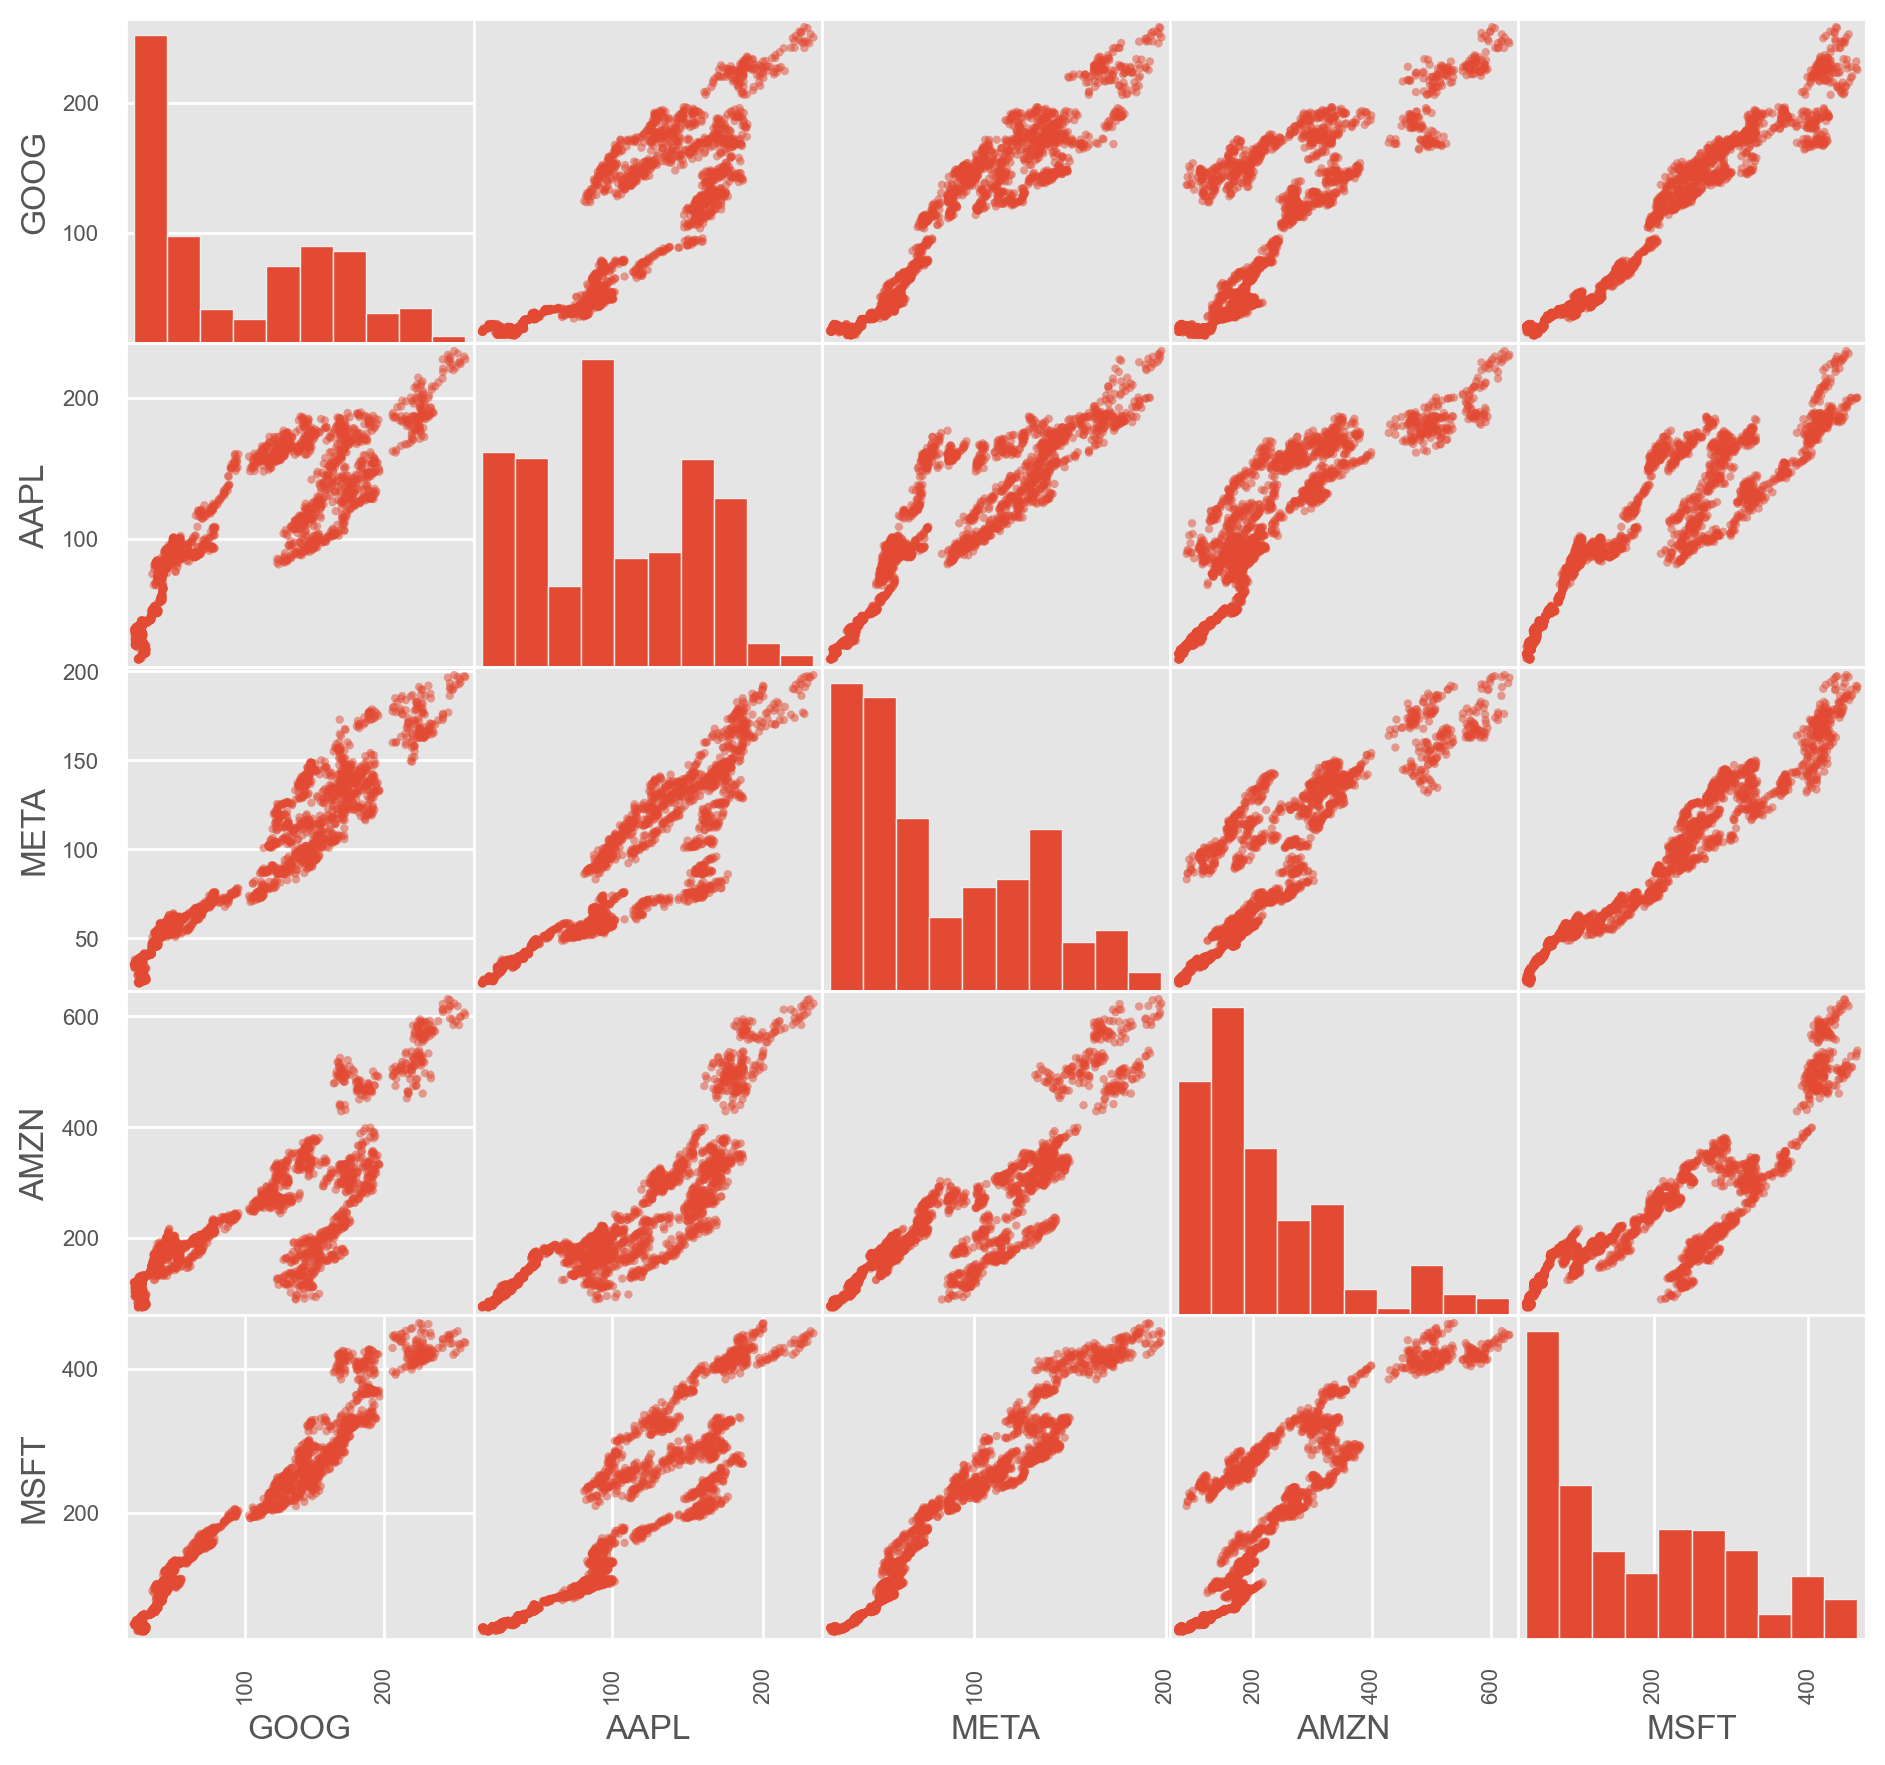

In [135]:
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

# Visualization of the closing prices evolution of each company

In [137]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 
np.random.seed(RANDOM_SEED)

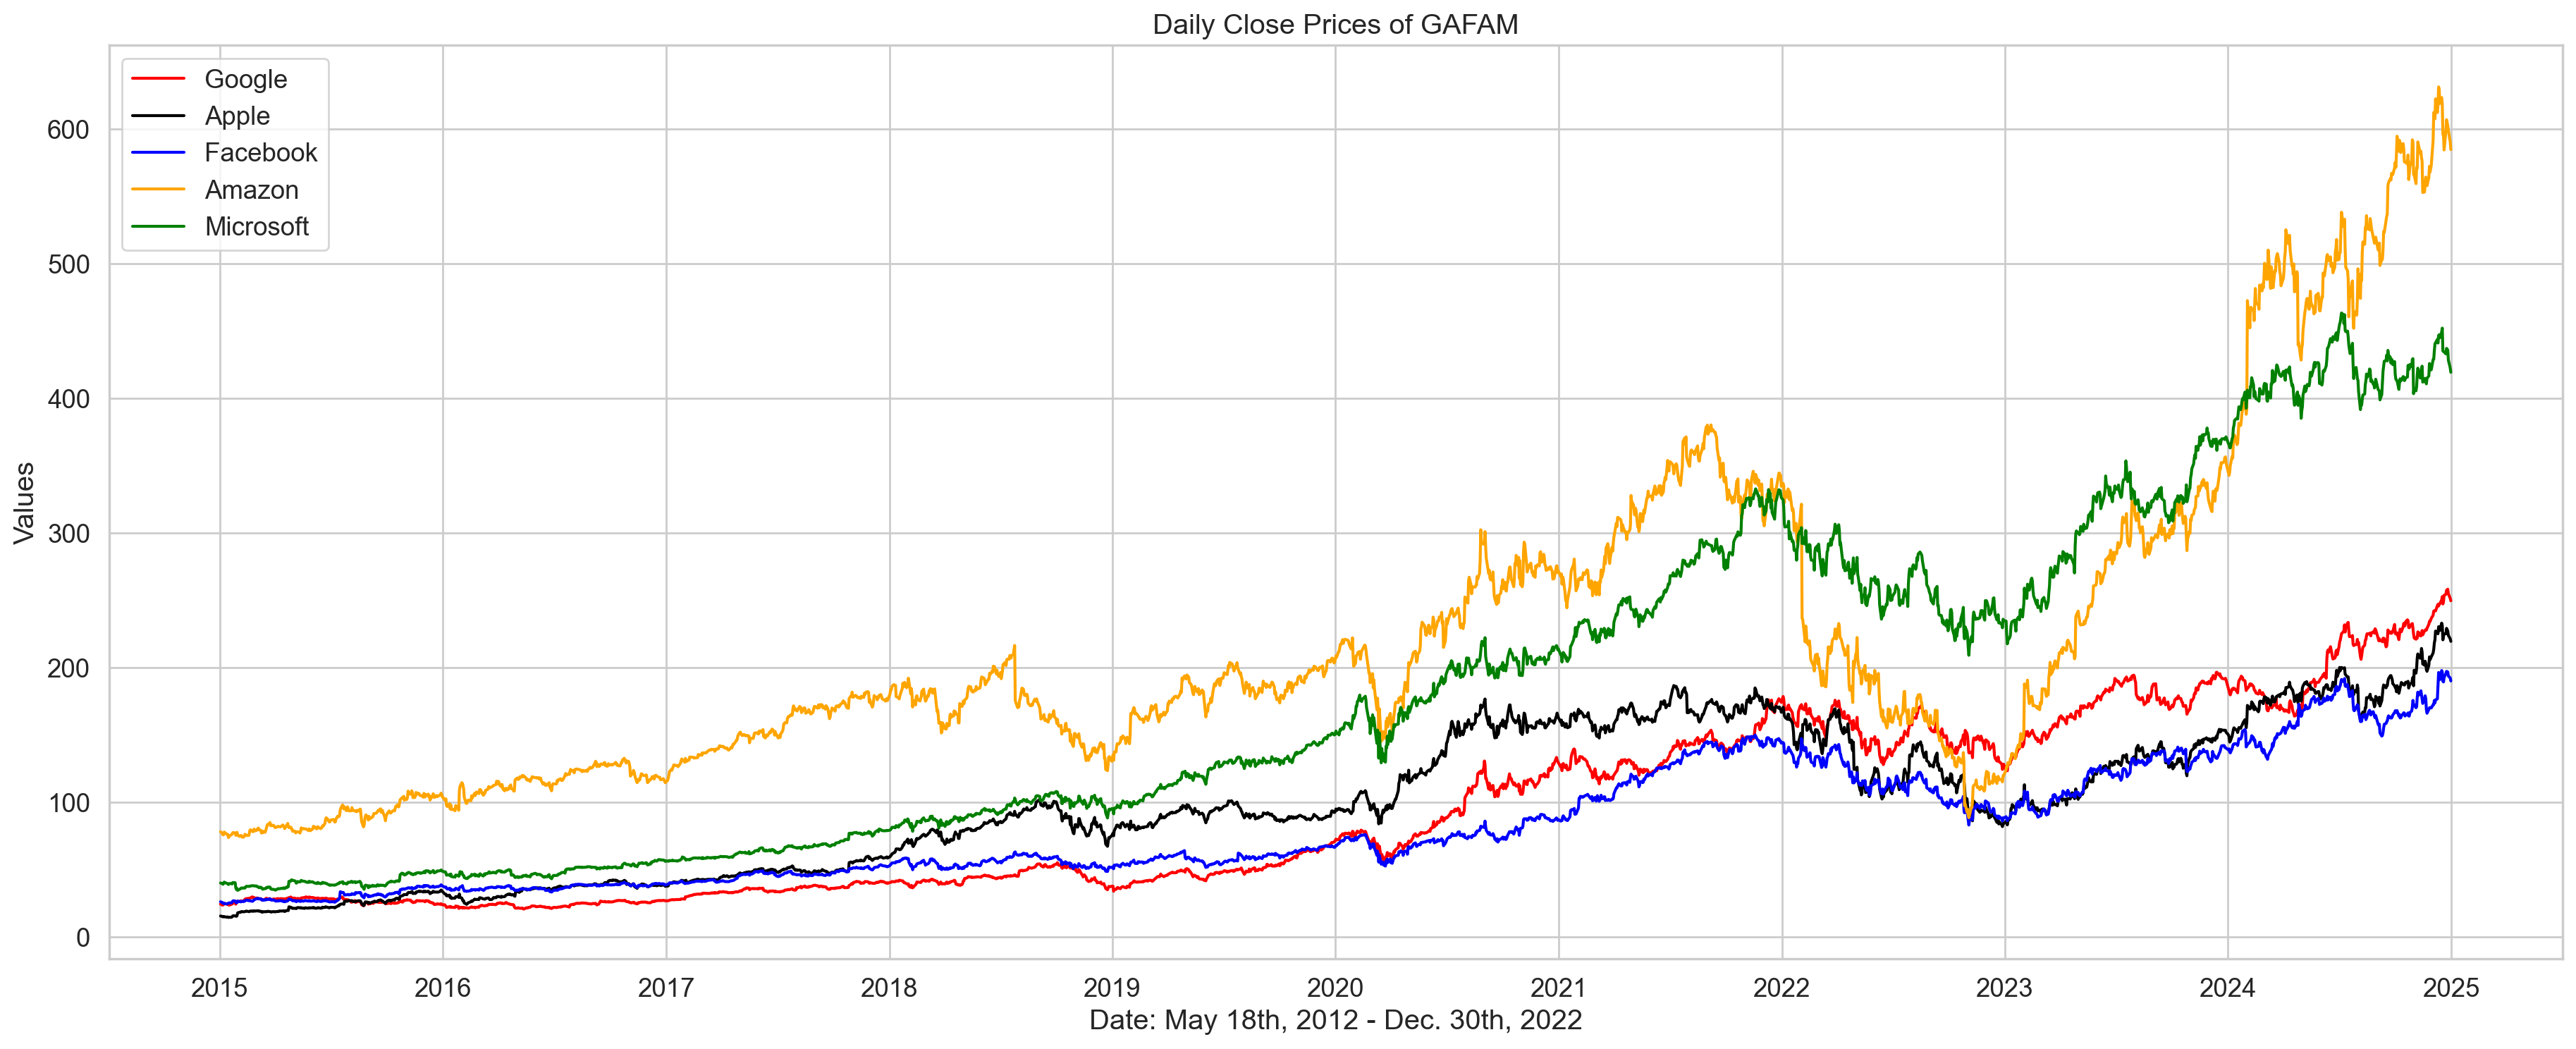

In [139]:
plt.figure(figsize=(20,8)) 
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

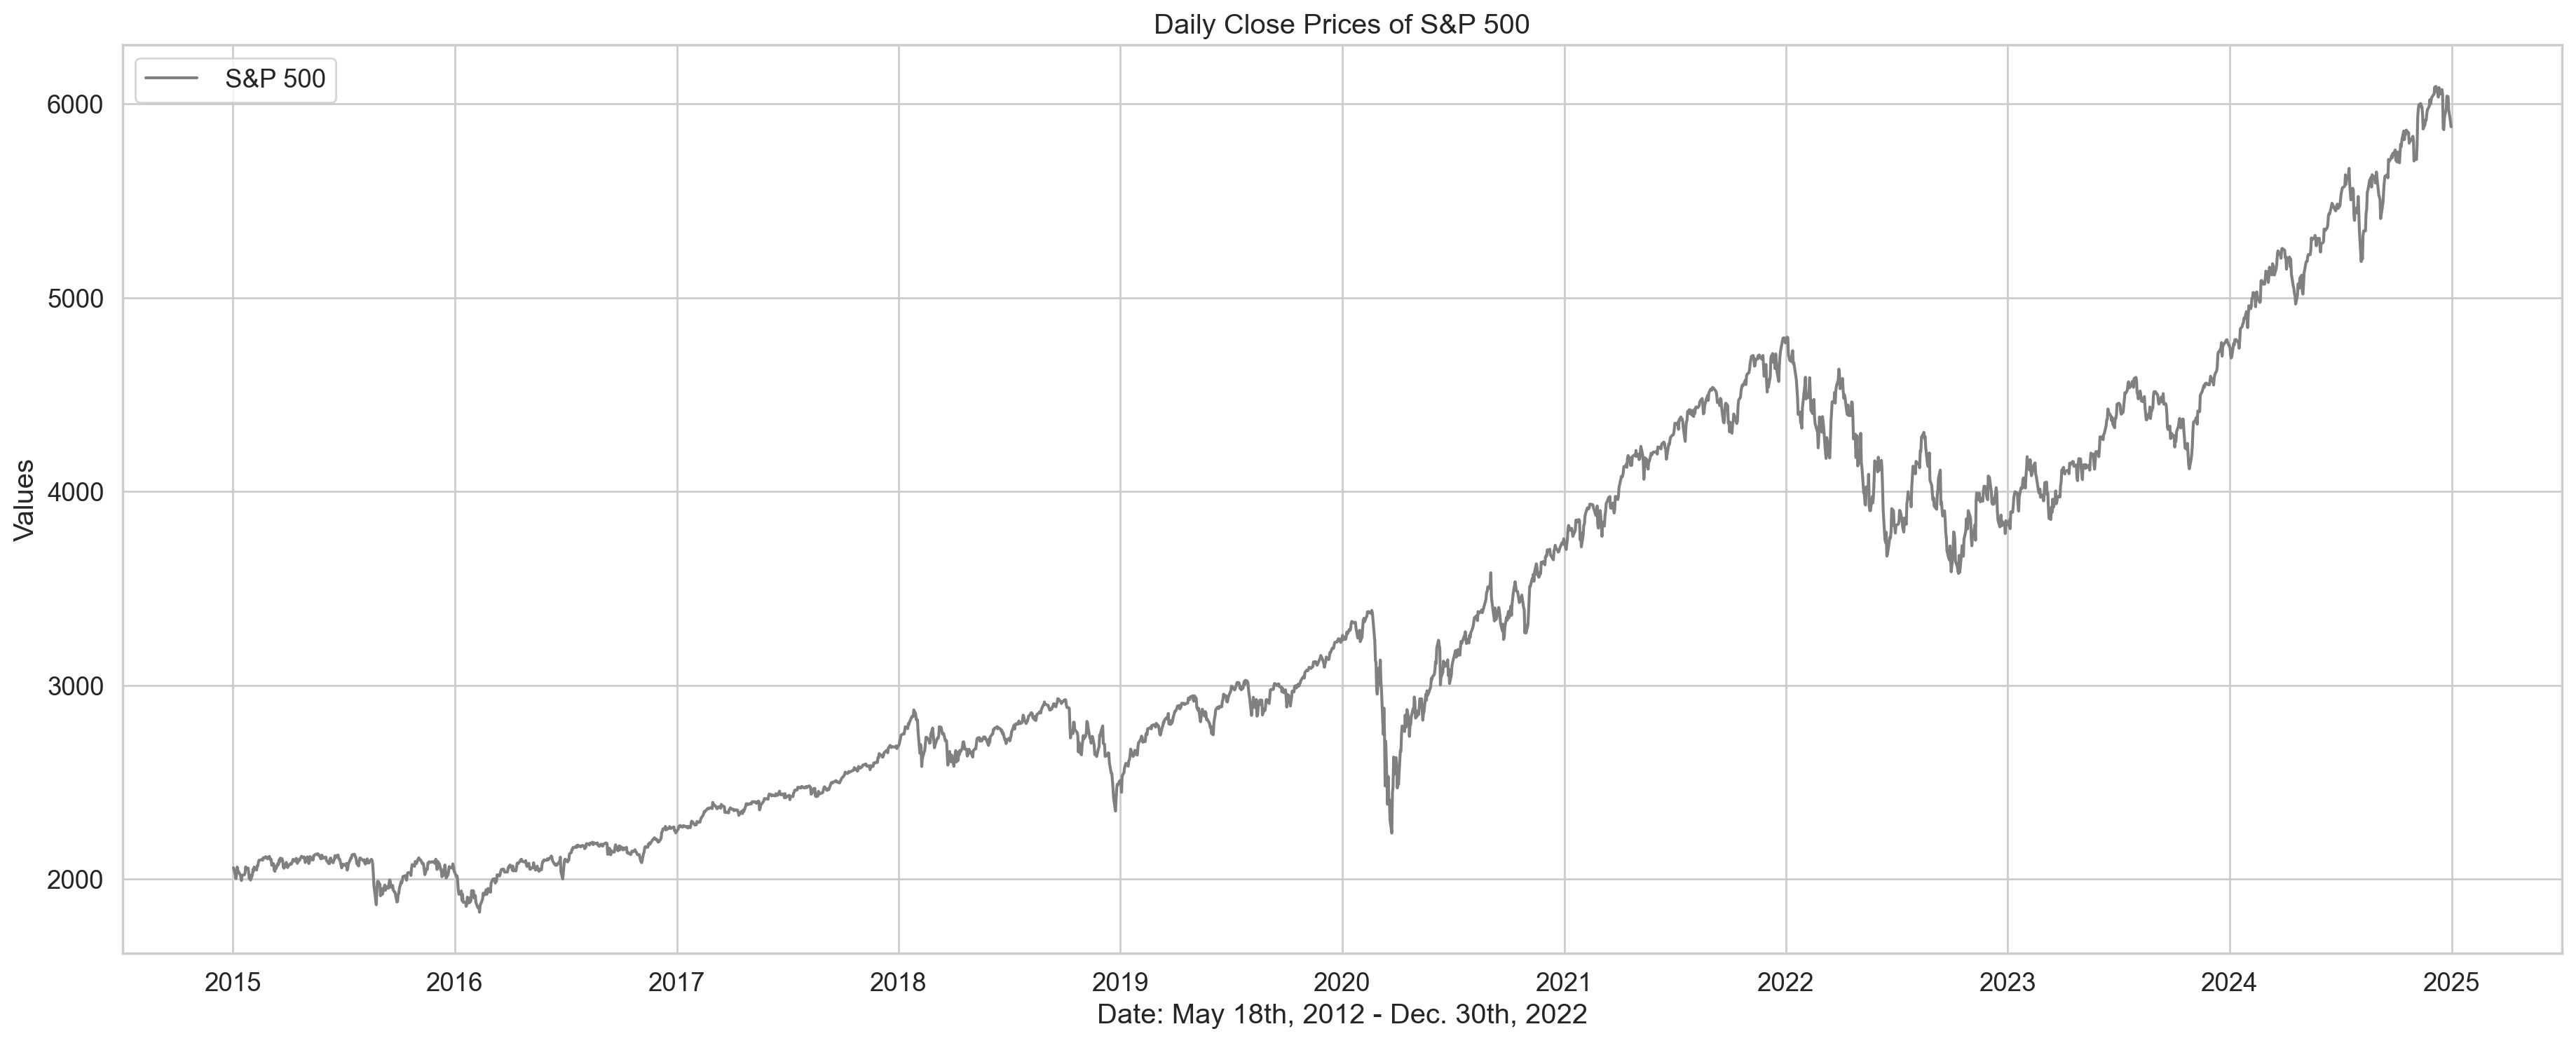

In [141]:
plt.figure(figsize=(20,8)) 
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

# Standard risk measure: Volatility 

In [149]:
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                   GOOG        AAPL        META        AMZN        MSFT  \
Date                                                                     
2015-01-02   24.261045   15.426000   26.014023   78.021965   39.933056   
2015-01-05   23.577583   15.109500   25.471745   76.768837   39.565834   
2015-01-06   23.579796   14.764500   24.881384   75.734520   38.985126   
2015-01-07   23.910435   14.921000   24.838755   75.734520   39.480442   
2015-01-08   24.829119   15.023000   24.917070   77.753448   40.641876   
...                ...         ...         ...         ...         ...   
2024-12-24  257.286652  229.050003  197.108261  606.742920  436.929108   
2024-12-26  258.103729  227.050003  196.639359  602.350220  435.715790   
2024-12-27  254.685883  223.750000  193.586487  598.816040  428.177216   
2024-12-30  251.307877  221.300003  192.239655  590.260254  422.508362   
2024-12-31  249.534180  219.389999  189.994904  584.539795  419.196564   

       

In [40]:
dataset.describe()

GOOG         AAPL         META         AMZN         MSFT  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     93.949921   101.233089    82.322926   221.131963   181.012796   
std      65.504728    54.173887    44.329813   121.281335   123.188360   
min      20.624056    14.347500    24.414942    73.645973    34.501602   
25%      35.257095    48.397126    46.201248   135.658279    64.823761   
50%      64.450451    94.572502    64.300545   182.091034   146.155922   
75%     150.379635   153.856247   120.278549   279.340012   275.278824   
max     258.103729   232.929993   197.696884   631.122498   463.240936   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  2516.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean   3356.124980     0.001088     0.001268     0.000952     0.001083   
std    1083.898653     0.017929     0.020650     0.017954     0.023617   
min    1829.079956    -0.128647    -0.140494    -0.111008    -0.263901   
25%    2432.287476    -0.007326    -0.008636    -0.007192    -0.009139   
50%    3004.994995     0.001001     0.001143     0.001180     0.000981   
75%    4204.595093     0.010142     0.011307     0.009463     0.012217   
max    6090.270020     0.119809     0.141311     0.160524     0.232824   

            R_MSFT       R_GSPC  
count  2515.000000  2515.000000  
mean      0.001081     0.000481  
std       0.017096     0.011230  
min      -0.147390    -0.119841  
25%      -0.006736    -0.003776  
50%       0.000958     0.000636  
75%       0.009768     0.005755  
max       0.142169     0.093828

# Daily volatility (in %) of each stock

In [42]:
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.017929
R_AAPL    0.020650
R_META    0.017954
R_AMZN    0.023617
R_MSFT    0.017096
R_GSPC    0.011230
dtype: float64

In [43]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns  of Google ')

    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns  of Apple')

    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    fig.show();

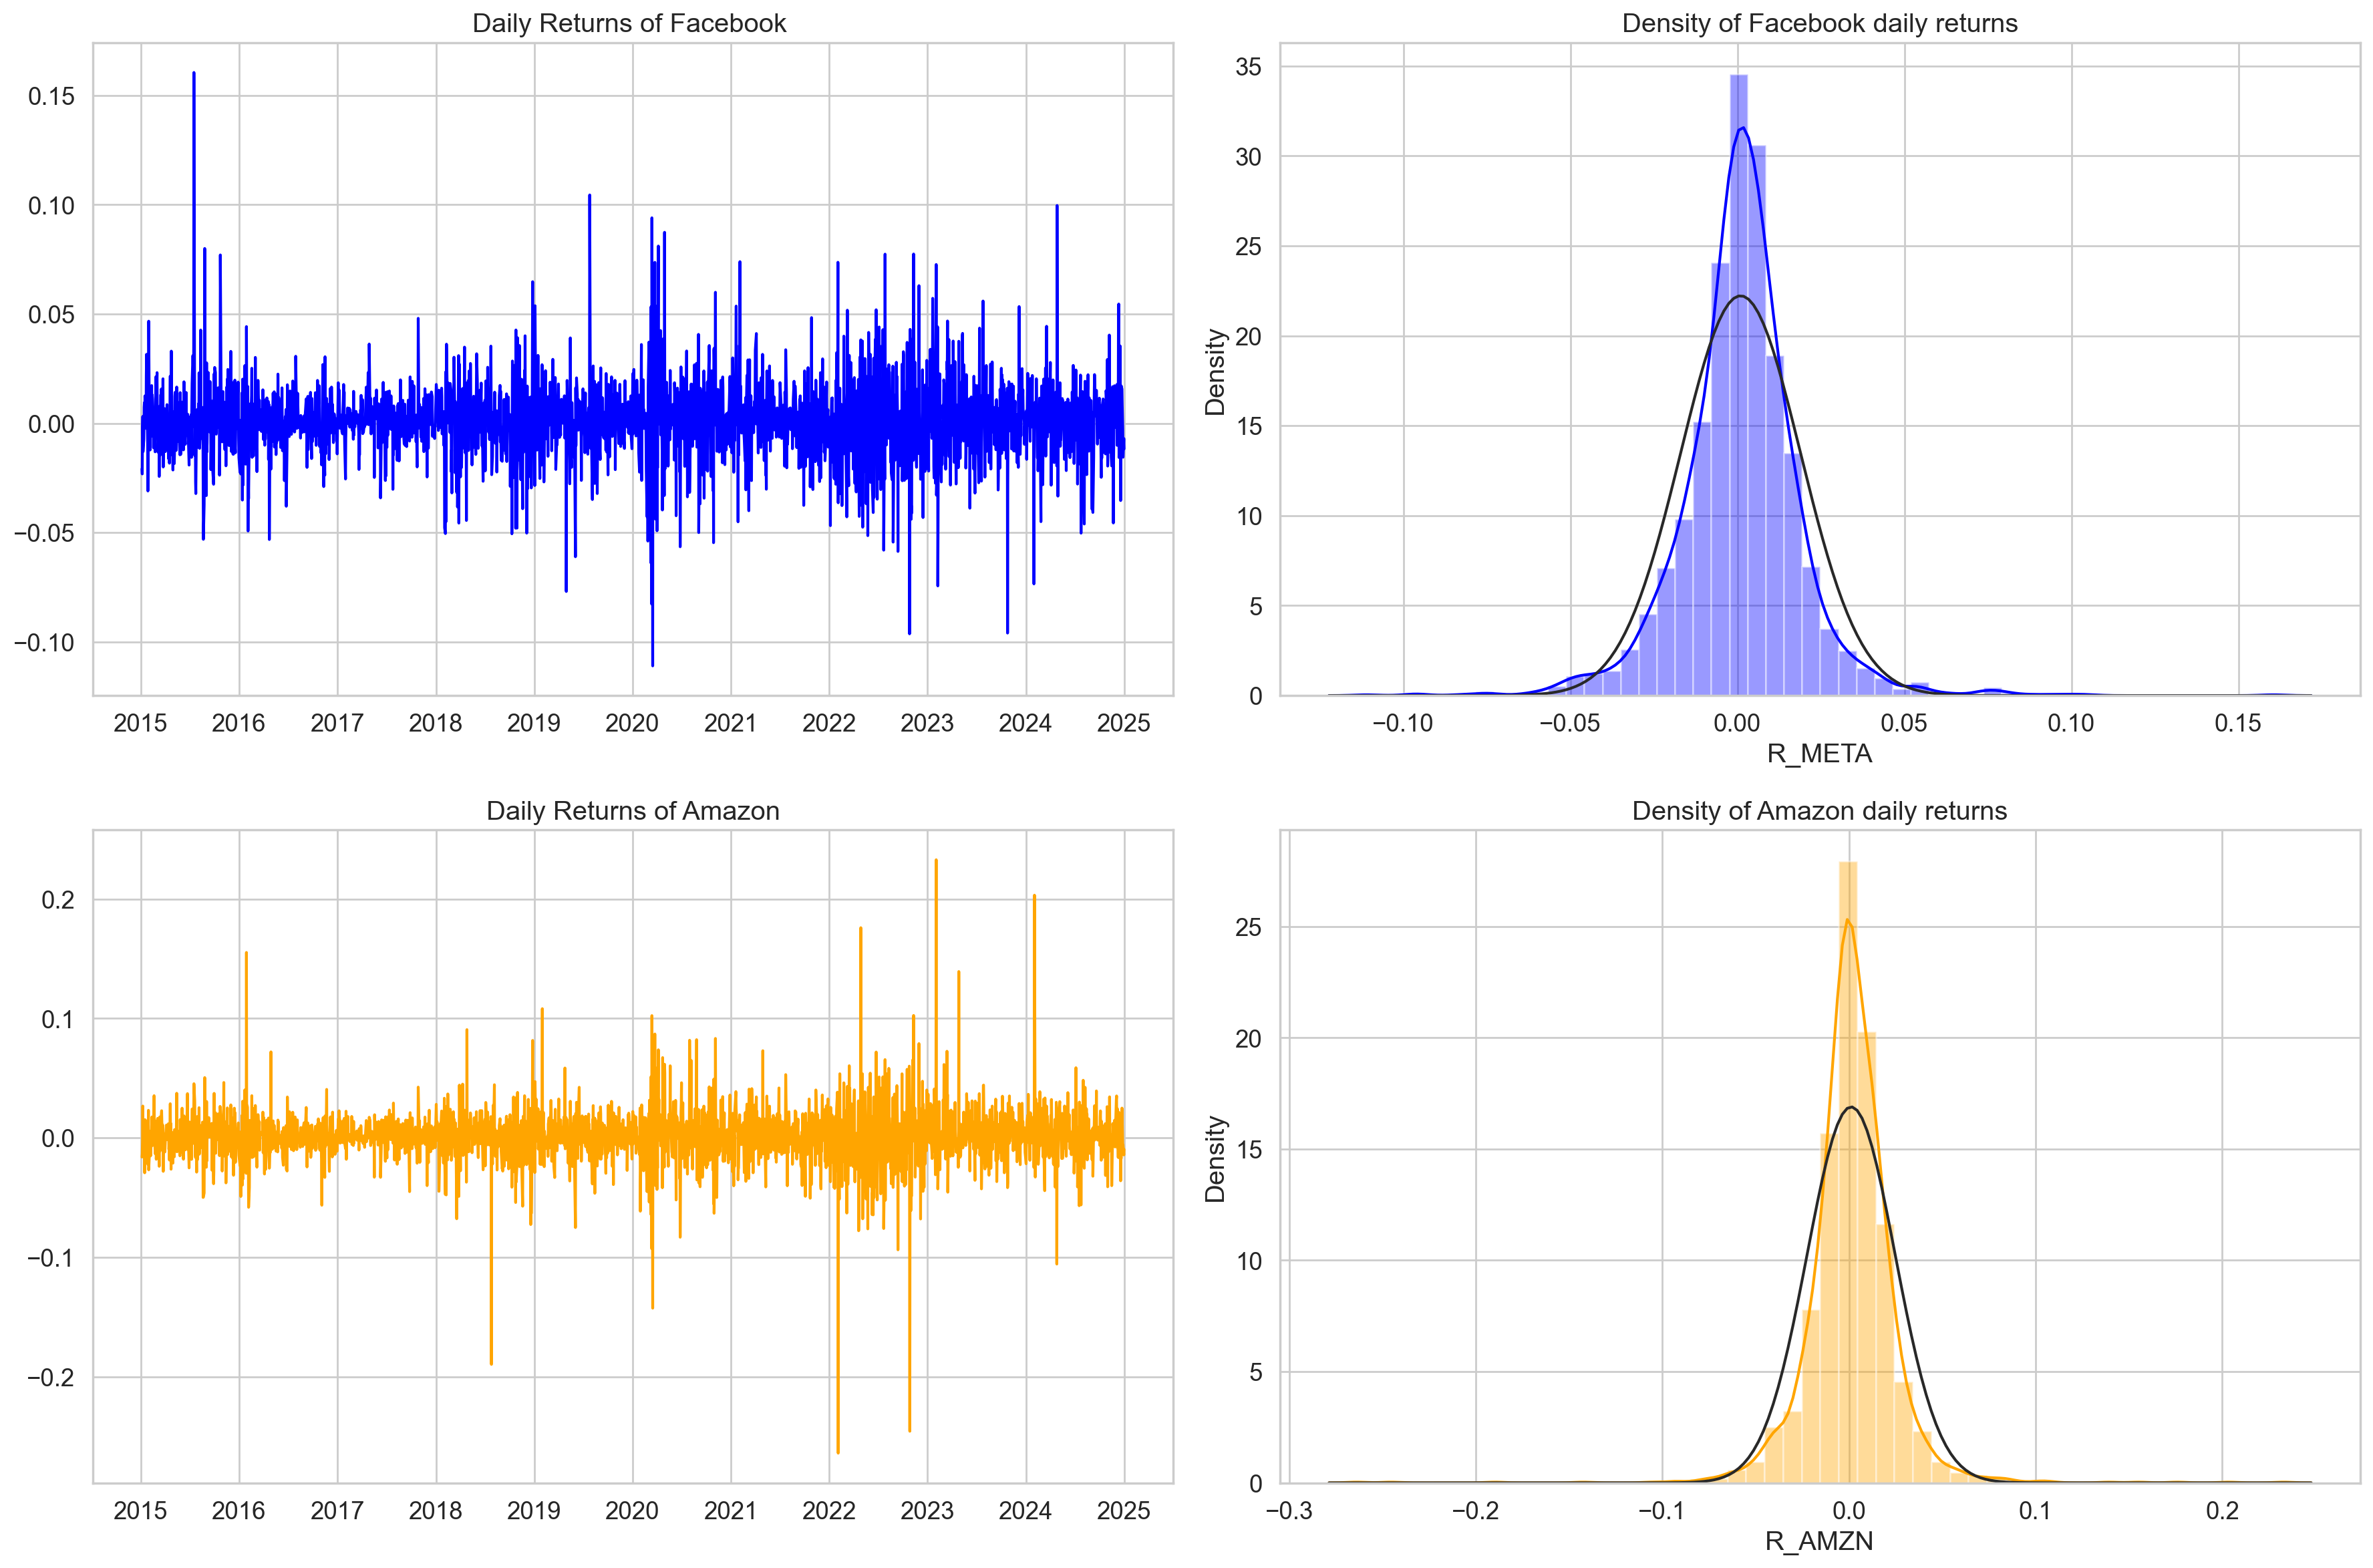

In [44]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')

    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')

    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')

    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    fig.show();

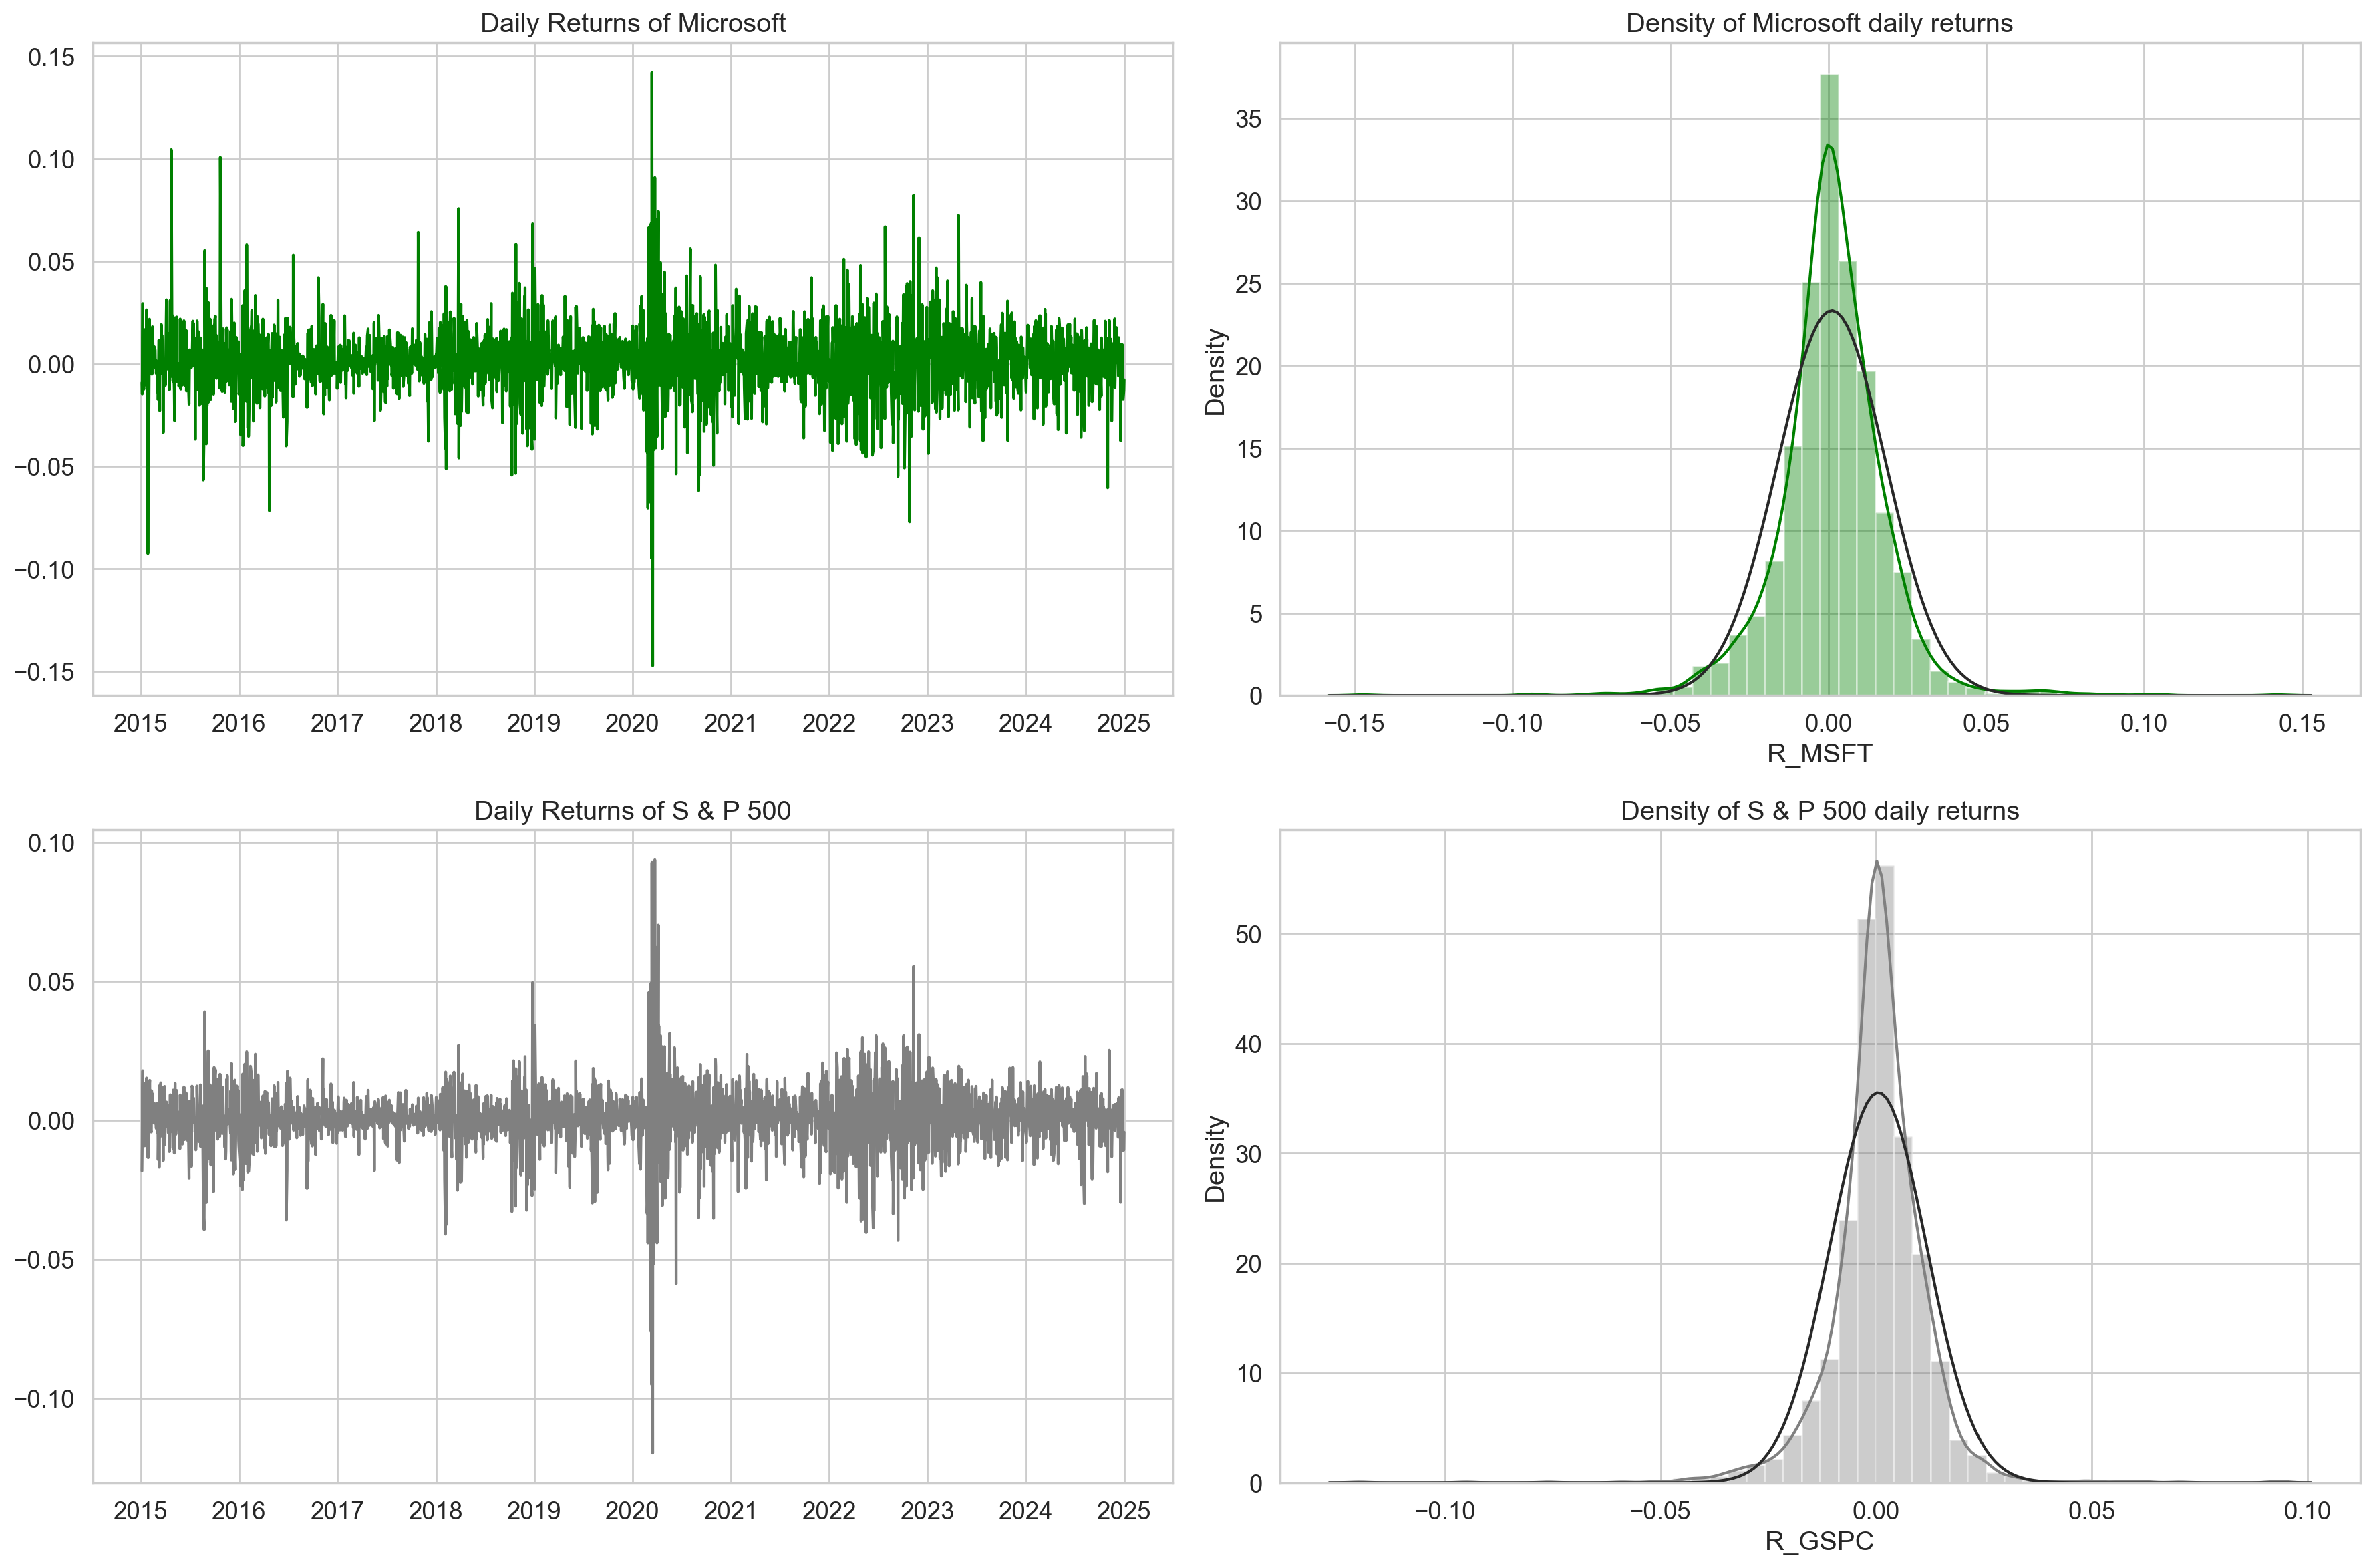

In [45]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')

    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')

    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')

    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    fig.show();

# Portfolio Optimization using Efficient Frontier

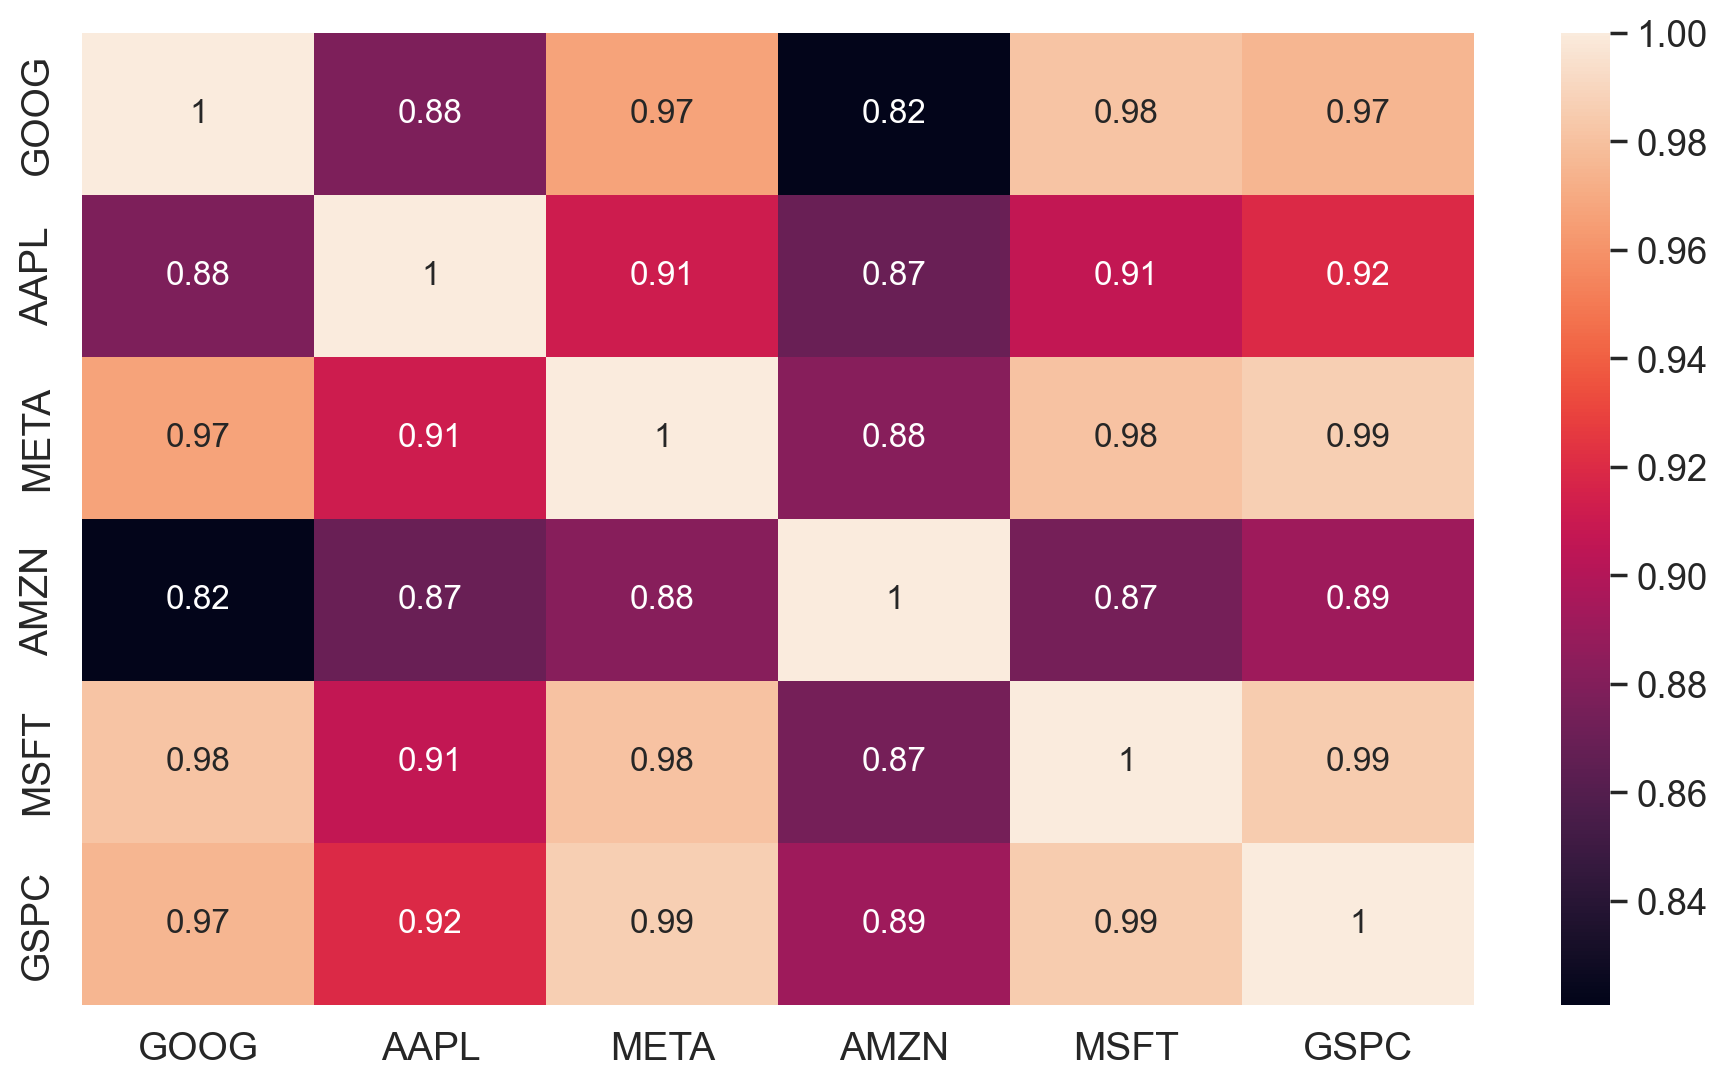

In [47]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

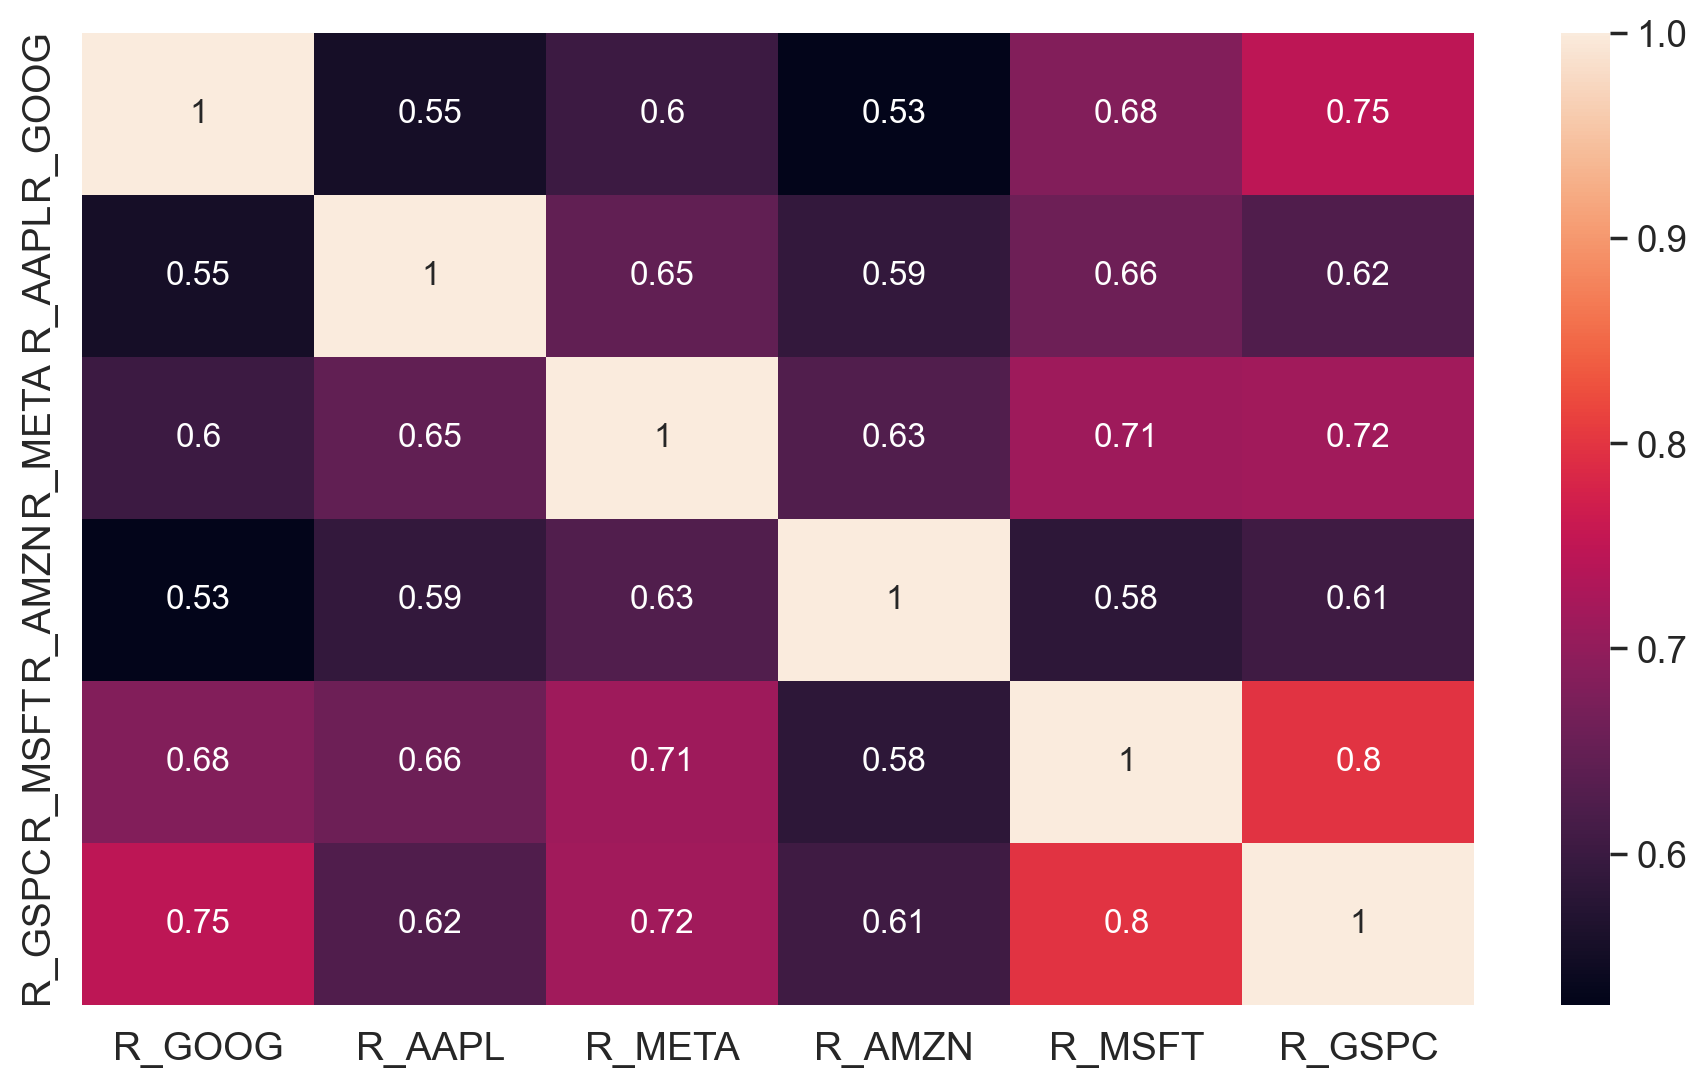

In [48]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [49]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 28.46 % per year
The volatility of the stock of R_AAPL = 32.78 % per year
The volatility of the stock of R_META = 28.5 % per year
The volatility of the stock of R_AMZN = 37.49 % per year
The volatility of the stock of R_MSFT = 27.14 % per year
The volatility of the stock of R_GSPC = 17.83 % per year


In [50]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 8.22 % per month
The volatility of the stock of R_AAPL = 9.46 % per month
The volatility of the stock of R_META = 8.23 % per month
The volatility of the stock of R_AMZN = 10.82 % per month
The volatility of the stock of R_MSFT = 7.83 % per month
The volatility of the stock of R_GSPC = 5.15 % per month


In [51]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [52]:
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.88
The Sharpe ratio of, R_AAPL = 0.9
The Sharpe ratio of, R_META = 0.75
The Sharpe ratio of, R_AMZN = 0.66
The Sharpe ratio of, R_MSFT = 0.91
The Sharpe ratio of, R_GSPC = 0.54


# Beta of a Security

In [151]:
cov = returns.cov() * 12 
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003857  0.002459  0.002323  0.002675  0.002512  0.001805
R_AAPL  0.002459  0.005117  0.002877  0.003460  0.002788  0.001739
R_META  0.002323  0.002877  0.003868  0.003190  0.002627  0.001735
R_AMZN  0.002675  0.003460  0.003190  0.006693  0.002827  0.001928
R_MSFT  0.002512  0.002788  0.002627  0.002827  0.003507  0.001839
R_GSPC  0.001805  0.001739  0.001735  0.001928  0.001839  0.001513

In [55]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1925104692877522


In [56]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1490969634789165


In [57]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.146091833418734


In [58]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.2739056698844253


In [59]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.2150419359201017


In [60]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


# Portfolio Simulation

In [62]:
from scipy.optimize import minimize

In [63]:
portfolio        = 2673  
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                         

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [64]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [153]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [66]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [67]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [68]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

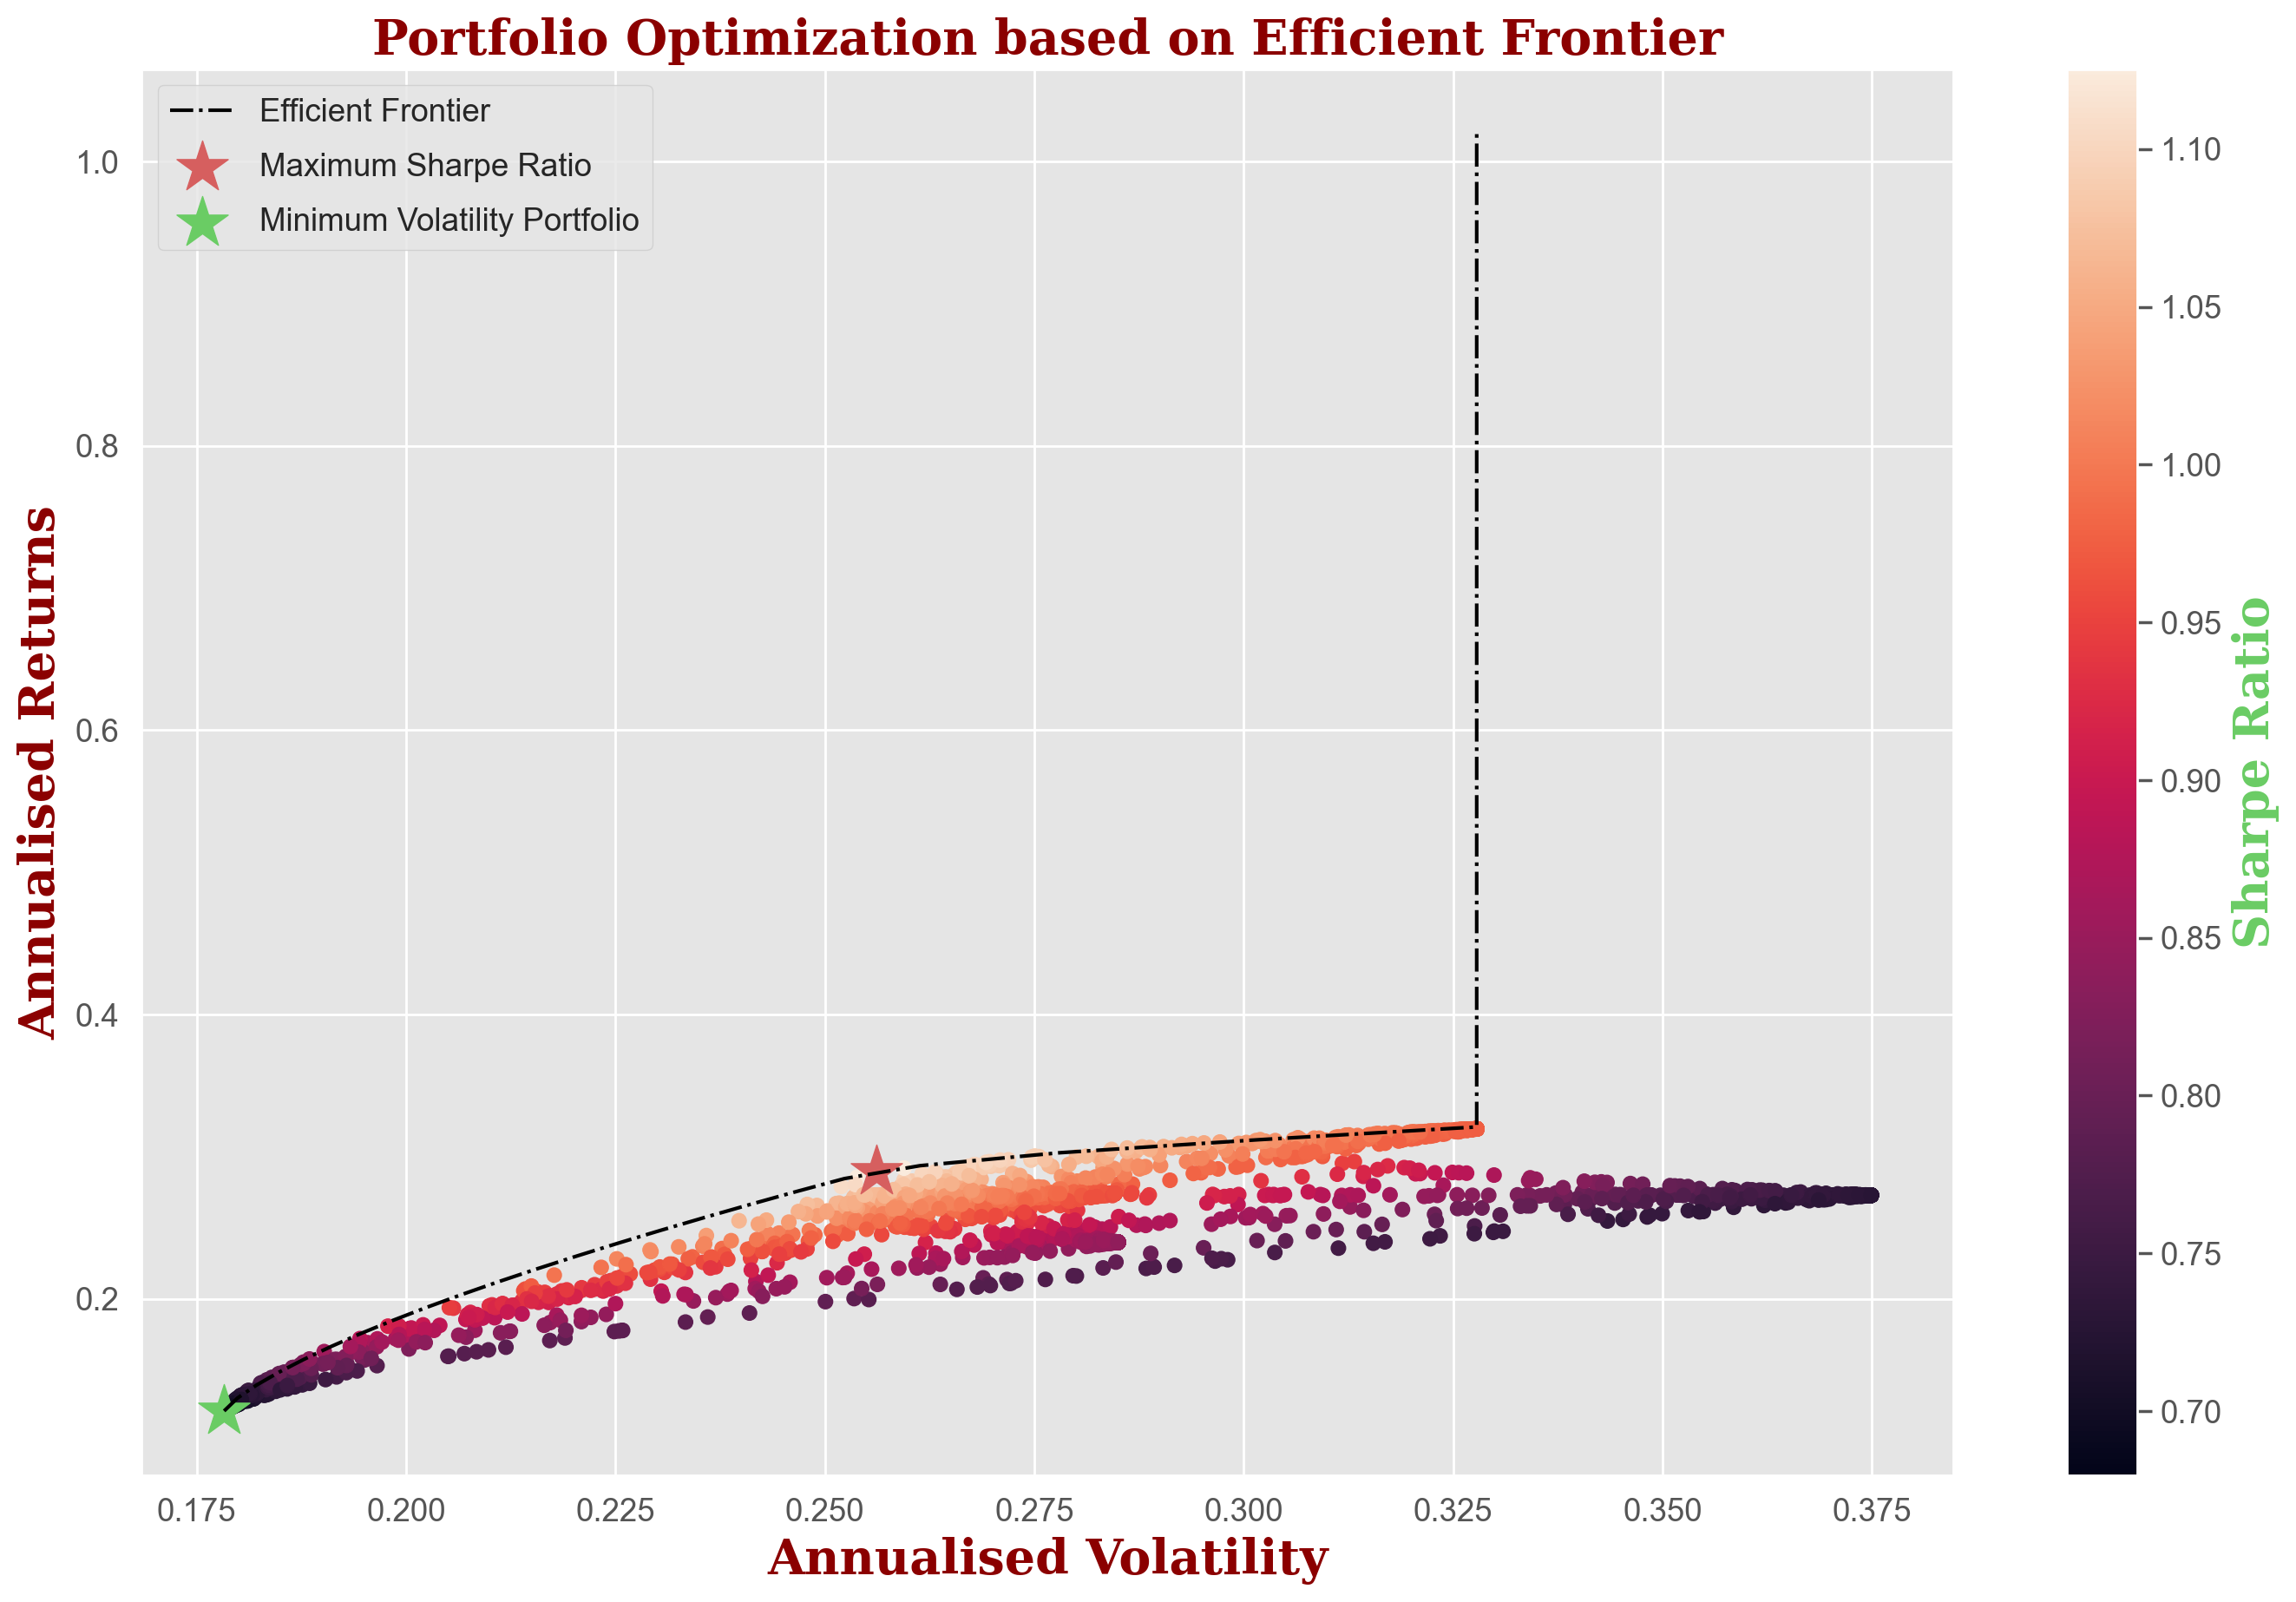

In [69]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

# Random portfolio simulation

In [71]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df


In [72]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [73]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [74]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

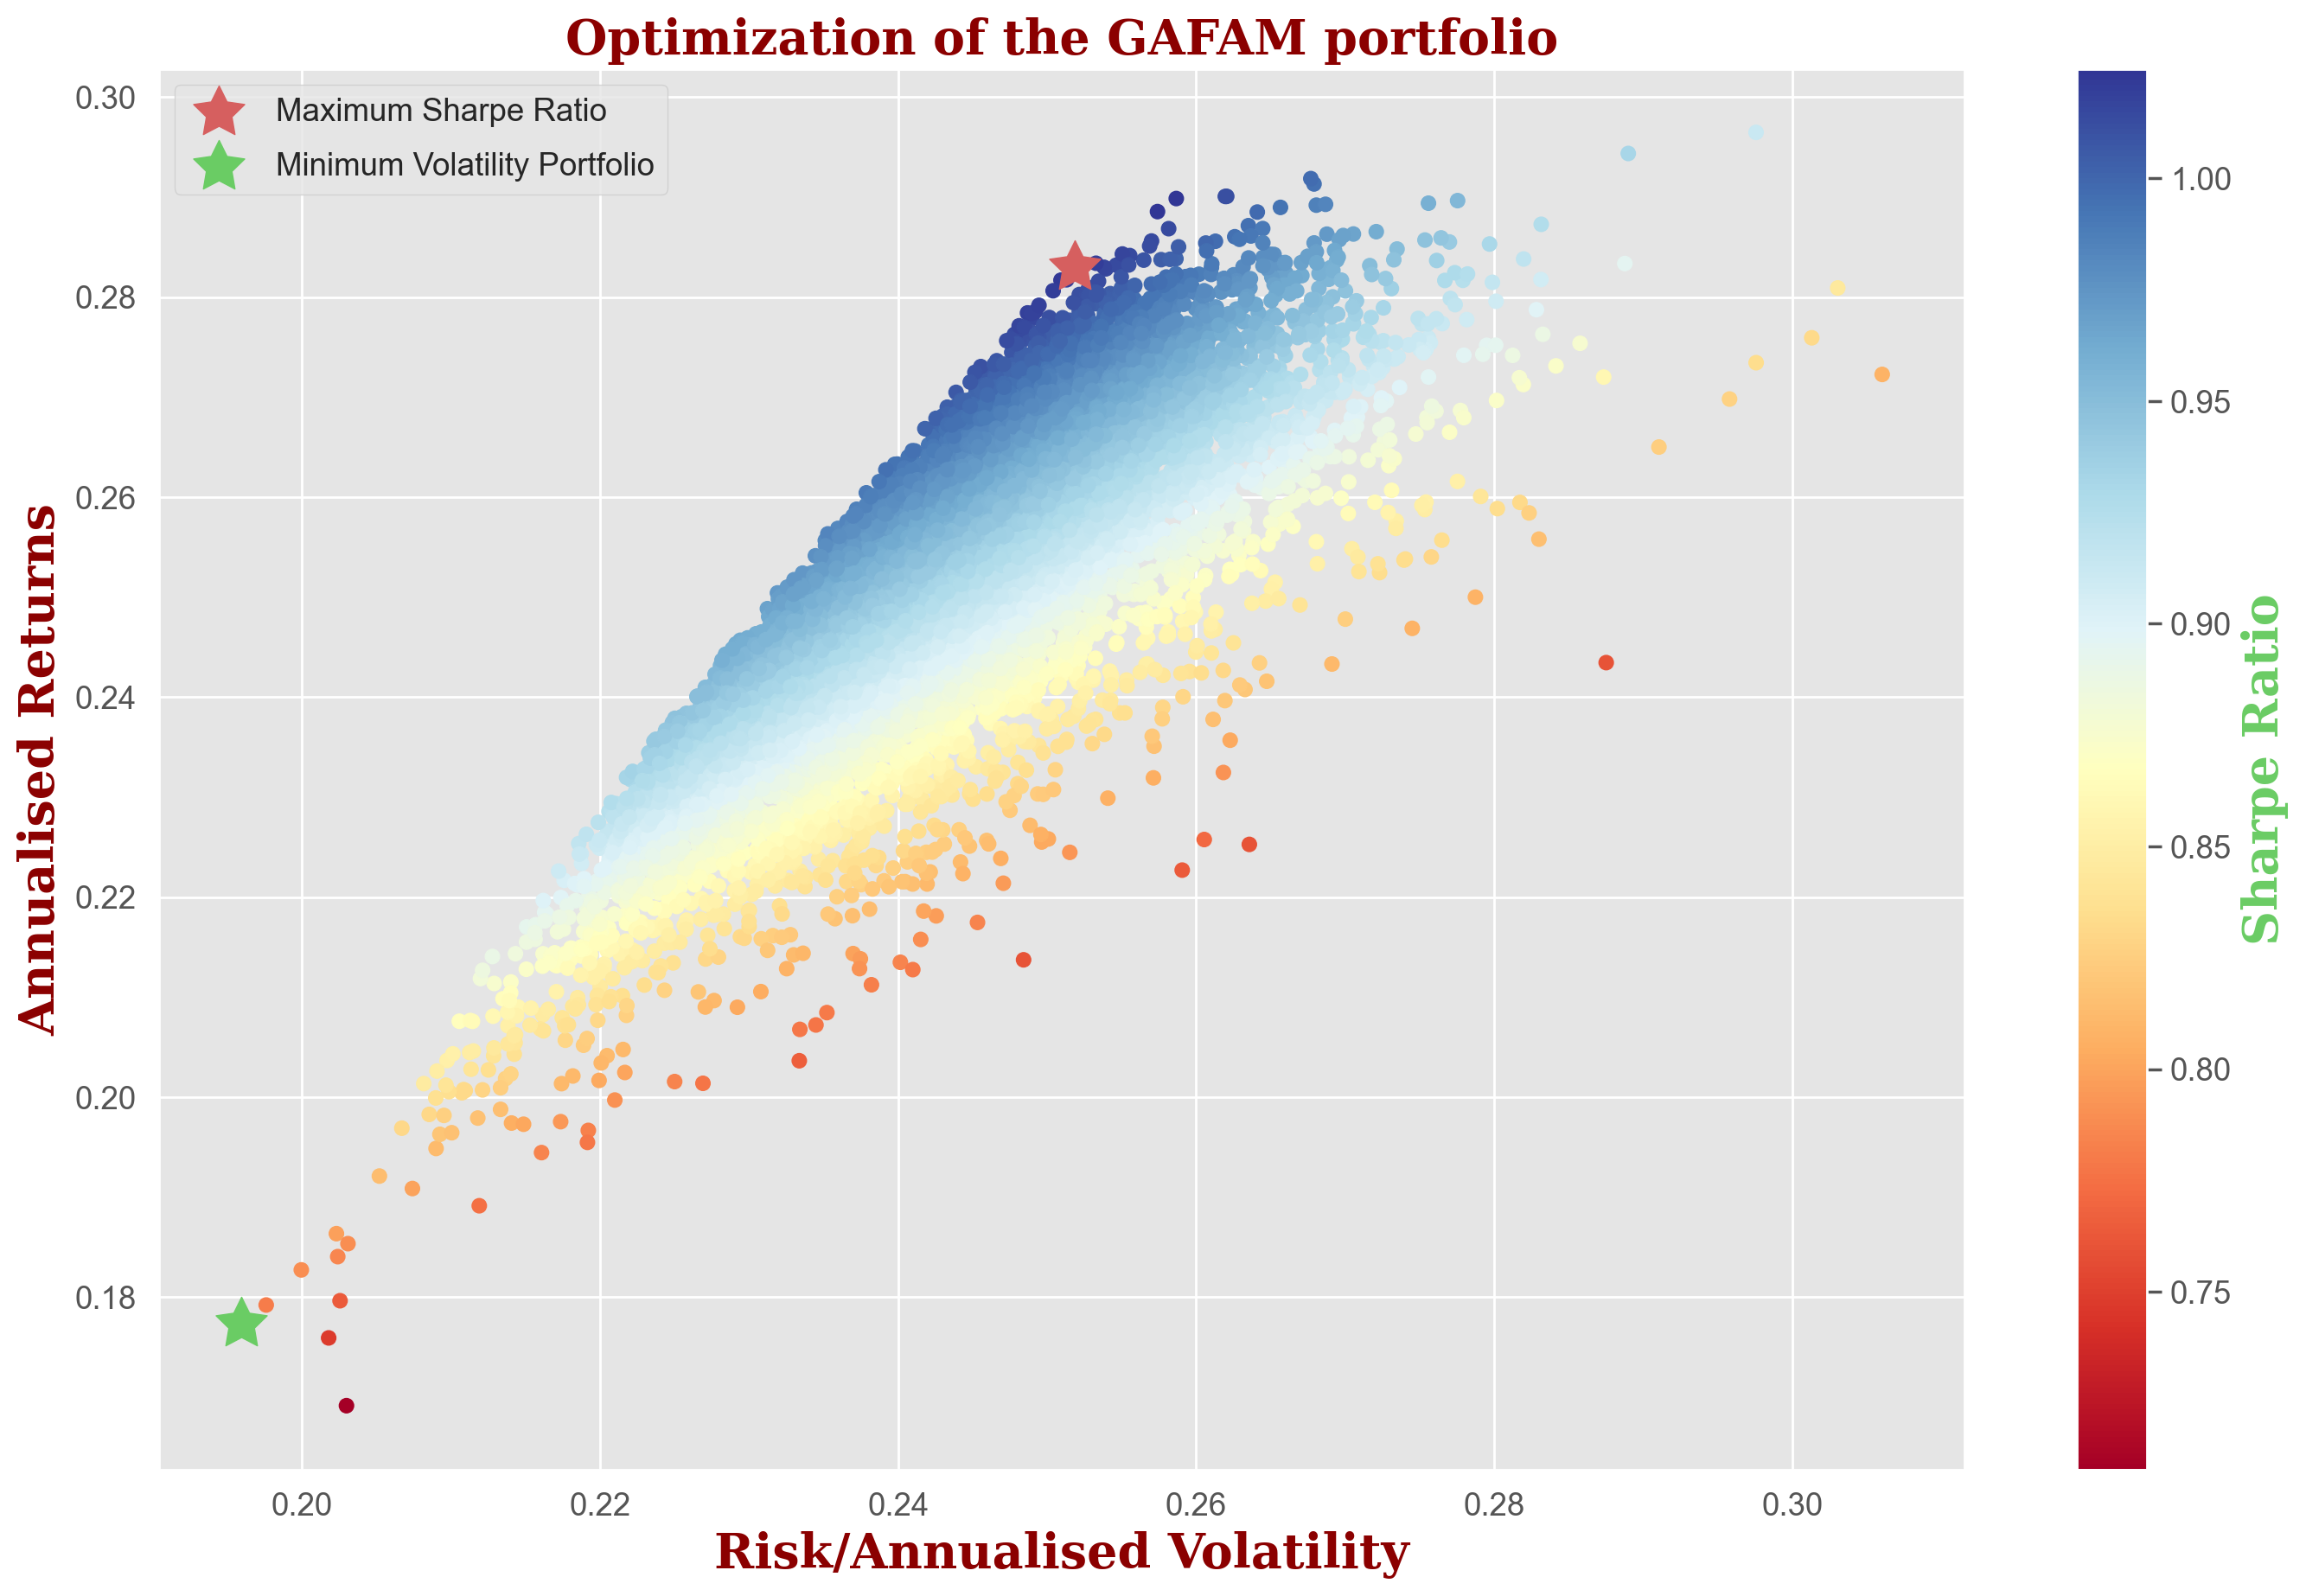

In [75]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

# The weights of the assets in the GAFAM portfolios

In [77]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than

ret     stdev    sharpe      GOOG      AAPL      META      AMZN  \
1999  0.283025  0.251822  1.024631  0.325908  0.258733  0.003005  0.039342   

          MSFT      GSPC  
1999  0.359087  0.013925

In [78]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev   sharpe      GOOG     AAPL      META      AMZN  \
2695  0.177307  0.195905  0.77745  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417